In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

## Không One Hot Encoding

In [7]:
# Data Preparation
data = np.genfromtxt('iris_full.csv',
                     delimiter=',',
                     skip_header=1)

X = data[:,:4]
y = data[:,-1:]

In [8]:
# Create model 
####### Cách 1 #######
model = keras.Sequential()
model.add(keras.Input(shape=(4,)))
model.add(keras.layers.Dense(units=3, activation='softmax'))

####### Cách 2 #######
model = keras.Sequential([keras.layers.Dense(units=3, 
                                             activation='softmax',
                                             input_shape=[4])])

####### Cách 3 #######
model = keras.Sequential()
model.add(keras.Input(shape=(4,)))
model.add(keras.layers.Dense(units=3))
model.add(keras.layers.Activation(keras.activations.softmax))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [9]:
# compile
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy')

# training
batch_size = 32
epochs = 200
history = model.fit(X, y, batch_size, epochs)

model.save('/content/model.h5')

Epoch 1/200
5/5 [==============================] - 0s 3ms/step - loss: 4.4298
Epoch 2/200
5/5 [==============================] - 0s 3ms/step - loss: 3.3019
Epoch 3/200
5/5 [==============================] - 0s 3ms/step - loss: 2.8629
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 2.5252
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 2.1915
Epoch 6/200
5/5 [==============================] - 0s 3ms/step - loss: 1.8943
Epoch 7/200
5/5 [==============================] - 0s 4ms/step - loss: 1.6673
Epoch 8/200
5/5 [==============================] - 0s 2ms/step - loss: 1.5291
Epoch 9/200
5/5 [==============================] - 0s 3ms/step - loss: 1.4565
Epoch 10/200
5/5 [==============================] - 0s 3ms/step - loss: 1.3949
Epoch 11/200
5/5 [==============================] - 0s 3ms/step - loss: 1.3430
Epoch 12/200
5/5 [==============================] - 0s 3ms/step - loss: 1.2957
Epoch 13/200
5/5 [==============================] - 0s 3ms/st

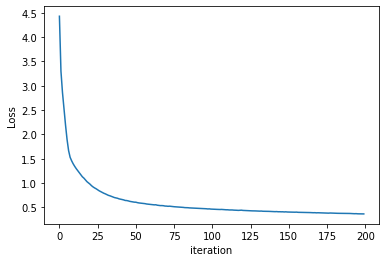

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()

In [12]:
# Load model
model = tf.keras.models.load_model('model.h5')

# Predict
preds = model(X)
preds = preds.numpy()

predicted_class = np.argmax(preds, axis=1)

In [14]:
# Evaluation
acc = np.mean(predicted_class == y[:, 0])
print(acc)

0.9733333333333334


## Dùng One hot Encoding

In [19]:
# Example

import tensorflow as tf

y = [0, 1, 2, 2, 1, 0, 1]
classes = 3
tf.one_hot(y, classes)

<tf.Tensor: shape=(7, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)>

In [27]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

# Data Preparation
data = np.genfromtxt('iris_full.csv',
                     delimiter=',',
                     skip_header=1)

X = data[:,:4]
y = data[:, -1]

classes = 3
onehots = tf.one_hot(y, classes)
print(onehots[:5])

tf.Tensor(
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]], shape=(5, 3), dtype=float32)


In [33]:
# create model
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(4,)))
model.add(keras.layers.Dense(units=3))
model.add(keras.layers.Activation(keras.activations.softmax))

# compile
model.compile(optimizer='sgd', loss='categorical_crossentropy')

# training
batch_size = 40
epochs = 500
history = model.fit(X, onehots, batch_size, epochs)

Epoch 1/500
4/4 [==============================] - 0s 3ms/step - loss: 7.3046
Epoch 2/500
4/4 [==============================] - 0s 3ms/step - loss: 5.3240
Epoch 3/500
4/4 [==============================] - 0s 4ms/step - loss: 3.4289
Epoch 4/500
4/4 [==============================] - 0s 3ms/step - loss: 1.9844
Epoch 5/500
4/4 [==============================] - 0s 3ms/step - loss: 1.3952
Epoch 6/500
4/4 [==============================] - 0s 3ms/step - loss: 1.2394
Epoch 7/500
4/4 [==============================] - 0s 3ms/step - loss: 1.1880
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 1.1595
Epoch 9/500
4/4 [==============================] - 0s 3ms/step - loss: 1.1224
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 1.1006
Epoch 11/500
4/4 [==============================] - 0s 3ms/step - loss: 1.0697
Epoch 12/500
4/4 [==============================] - 0s 3ms/step - loss: 1.0416
Epoch 13/500
4/4 [==============================] - 0s 3ms/st

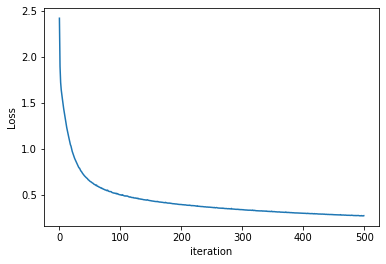

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()

In [31]:
# Evaluation
preds = model(X)
preds = preds.numpy()
predicted_class = np.argmax(preds, axis=1)

acc = np.mean(predicted_class == y)
print(acc.mean())

0.96
